In [1]:
import os.path as op
import sys

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sys.path.append('..')
from dsutils import get_original

In [4]:
# Read data, metadata from figshare, store locally.
data_fname = get_original('https://ndownloader.figshare.com/files/22279323',
                         'Civil_Service_List__Active_.csv',
                         'e4894d996891228a1d5175e1adbfdbe1')
meta_fname = get_original('https://ndownloader.figshare.com/files/22279611',
                          'Civil_Service_List_Active_Definitions.xlsx',
                          'f7930ec900c015c6fe760b9be3e29a7e')

In [5]:
def proc_cols(df):
    """ Clean civil list data
    """
    wanted = ['Exam No',
              'First Name',
              'MI',
              'Last Name',
              'Adj. FA',
              'List Title Code',
              'List Title Desc',
              'List Agency Code',
              'List Agency Desc',
              'Published Date']
    slim = df.loc[:, wanted]
    slim['Published Date'] = pd.to_datetime(slim['Published Date'])
    return slim

In [6]:
def first_or_n(col):
    """ Return first value if all values equal, else number of values
    """
    unique = col.unique()
    if len(unique) > 1:
        return len(col)
    return unique[0]

In [7]:
# Use low_memory=False to correctly infer data types from columns.
df = pd.read_csv(data_fname, low_memory=False)
df.head()

,Exam No,List No,First Name,MI,Last Name,Adj. FA,List Title Code,List Title Desc,Group No,List Agency Code,List Agency Desc,List Div Code,Published Date,Established Date,Anniversary Date,Extension Date,Veteran Credit,Parent Lgy Credit,Sibling Lgy Credit,Residency Credit
0,7012,109.0,KARA,C,KUAN-LAM,100.0,10015,ADMINISTRATIVE ENGINEER,0,0,OPEN COMPETITIVE,NaN,05/24/2017,12/27/2017,12/27/2021,NaN,NaN,NaN,NaN,NaN
1,7012,110.0,ARMINDO,G,MONTEIRO,100.0,10015,ADMINISTRATIVE ENGINEER,0,0,OPEN COMPETITIVE,NaN,05/24/2017,12/27/2017,12/27/2021,NaN,NaN,NaN,NaN,NaN
2,7012,111.0,GEORGE,G,SARKISSIAN,100.0,10015,ADMINISTRATIVE ENGINEER,0,0,OPEN COMPETITIVE,NaN,05/24/2017,12/27/2017,12/27/2021,NaN,NaN,NaN,NaN,NaN
3,7012,112.0,PHILIP,NaN,CAPONITI,100.0,10015,ADMINISTRATIVE ENGINEER,0,0,OPEN COMPETITIVE,NaN,05/24/2017,12/27/2017,12/27/2021,NaN,NaN,NaN,NaN,NaN
4,7012,113.0,NITISH,P,TAILOR,100.0,10015,ADMINISTRATIVE ENGINEER,0,0,OPEN COMPETITIVE,NaN,05/24/2017,12/27/2017,12/27/2021,NaN,NaN,NaN,NaN,NaN


In [8]:
# Get people who have taken open Police Officer exam.
# Exams which are not "OPEN COMPETITIVE" are promotion exams.
p_df = df[(df['List Title Desc'] == 'POLICE OFFICER') &
          (df['List Agency Desc'] == 'OPEN COMPETITIVE')
         ]
police = proc_cols(p_df)

In [9]:
# Sort exams by recency of publication.
# first_or_n returns n for columns not identical between entries.
# Thus "Adj. FA" below is the number of people taking that exam.
pgb = police.groupby('Exam No').agg(first_or_n).sort_values(
                     'Published Date', ascending=False)
pgb

,First Name,MI,Last Name,Adj. FA,List Title Code,List Title Desc,List Agency Code,List Agency Desc,Published Date
Exam No,,,,,,,,,
8339,13819,13819,13819,13819.0,70210,POLICE OFFICER,0,OPEN COMPETITIVE,2019-02-27
7326,5969,5969,5969,5969.0,70210,POLICE OFFICER,0,OPEN COMPETITIVE,2018-04-11
7323,10987,10987,10987,10987.0,70210,POLICE OFFICER,0,OPEN COMPETITIVE,2017-09-27
5329,1165,1165,1165,1165.0,70210,POLICE OFFICER,0,OPEN COMPETITIVE,2016-06-01
5326,582,582,582,582.0,70210,POLICE OFFICER,0,OPEN COMPETITIVE,2016-03-30
5325,712,712,712,712.0,70210,POLICE OFFICER,0,OPEN COMPETITIVE,2016-03-03
5321,772,772,772,772.0,70210,POLICE OFFICER,0,OPEN COMPETITIVE,2016-03-02
5320,696,696,696,696.0,70210,POLICE OFFICER,0,OPEN COMPETITIVE,2015-12-31
5317,962,962,962,962.0,70210,POLICE OFFICER,0,OPEN COMPETITIVE,2015-12-30


In [10]:
# In the groupby, "Adj. FA" is the number of people taking that exam.
big_exams = pgb[pgb['Adj. FA'] > 10000]
big_exams

,First Name,MI,Last Name,Adj. FA,List Title Code,List Title Desc,List Agency Code,List Agency Desc,Published Date
Exam No,,,,,,,,,
8339,13819,13819,13819,13819.0,70210,POLICE OFFICER,0,OPEN COMPETITIVE,2019-02-27
7323,10987,10987,10987,10987.0,70210,POLICE OFFICER,0,OPEN COMPETITIVE,2017-09-27


In [11]:
# Select big 2017 and 2019 exams.
dates = big_exams['Published Date']

def jan1(year):
    return pd.Timestamp(year, 1, 1)

exam_2017 = big_exams.index[(dates > jan1(2017)) & (dates < jan1(2018))].item()
exam_2019 = big_exams.index[(dates > jan1(2019)) & (dates < jan1(2020))].item()
exam_2017, exam_2019

(7323, 8339)

count    10987.000000
mean        89.164978
std          7.054645
min         70.590000
25%         84.710000
50%         89.710000
75%         94.410000
max        114.410000
Name: Adj. FA, dtype: float64

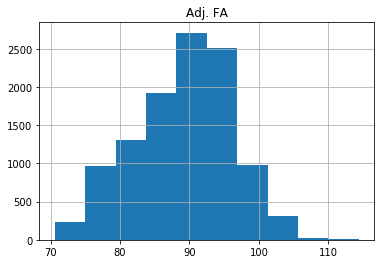

In [12]:
police_2017 = police[police['Exam No'] == exam_2017]
police_2017.hist('Adj. FA')
police_2017['Adj. FA'].describe()

count    13819.000000
mean        88.908311
std          7.104658
min         70.420000
25%         84.070000
50%         89.760000
75%         94.310000
max        111.590000
Name: Adj. FA, dtype: float64

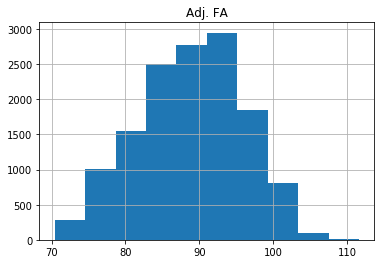

In [13]:
police_2019 = police[police['Exam No'] == exam_2019]
police_2019.hist('Adj. FA')
police_2019['Adj. FA'].describe()

In [14]:
# Columns to output in processed files.
out_cols = ['First Name',
            'MI',
            'Last Name',
            'Adj. FA']

In [15]:
# Write processed 2017 exam scores.
fname_2017 = op.join('processed', 'nyc_police_exam_sept_2017.csv')
police_2017.loc[:, out_cols].to_csv(fname_2017, index=None)
pd.read_csv(fname_2017).head()

,First Name,MI,Last Name,Adj. FA
0,RICARDO,J,CRUZ,71.77
1,PATRICK,M,CARLIN,71.77
2,QUDUS,NaN,ADEBOWALE,71.77
3,ERIC,C,ALLBRIGHT,71.77
4,CRISTIAN,NaN,BENITEZ,71.77


In [16]:
# Write processed 2019 exam scores.
fname_2019 = op.join('processed', 'nyc_police_exam_feb_2019.csv')
police_2019.loc[:, out_cols].to_csv(fname_2019, index=None)
pd.read_csv(fname_2019).head()

,First Name,MI,Last Name,Adj. FA
0,JONATHAN,R,HESCHL,88.62
1,SEAN,NaN,BODAH,88.62
2,NAZIR,NaN,NAZARY,88.62
3,AARON,C,BONITTO,88.62
4,JOSEPH,NaN,XIAO,88.62


In [17]:
# Read data definitions.
meta = pd.read_excel(op.join('originals', 'Civil_Service_List_Active_Definitions.xlsx'),
                     sheet_name='Data Dictionary').dropna()
meta

,Order Number,Column Name,Description,Expected Values
0,1.0,Exam No,A four (4) digit number that identifies a civi...,Number
2,2.0,List No,An eligible candidate’s placement on a given l...,Number
4,3.0,First Name,A candidate’s first name as it appears on thei...,Plain Text
5,4.0,MI,A candidate’s middle initial (MI) as it appear...,Plain Text
6,5.0,Last Name,A candidate’s last name as it appears on their...,Plain Text
7,6.0,Adj. FA,The Adjusted Final Average (“Adj. FA” or “AFA”...,Number
8,7.0,List Title Code,A five (5) digit number that corresponds to an...,Number
9,8.0,List Title Desc,A descriptive name that identifies a civil ser...,Plain Text
10,9.0,Group No,Represents the certification order for a list....,Number
11,10.0,List Agency Code,A three (3) digit number used to identify an a...,Number


In [18]:
# Select columns from metadata.
out_col_meta = meta.loc[meta['Column Name'].isin(out_cols),
                        ['Column Name', 'Description']]
out_col_meta

,Column Name,Description
4,First Name,A candidate’s first name as it appears on thei...
5,MI,A candidate’s middle initial (MI) as it appear...
6,Last Name,A candidate’s last name as it appears on their...
7,Adj. FA,The Adjusted Final Average (“Adj. FA” or “AFA”...


In [19]:
# Write data dictionary.
out_fname_meta = op.join('processed', 'nyc_police_exam_data_dict.md')
with open(out_fname_meta, 'wt') as fobj:
    fobj.write('# NYC Civil List police exam data dictionary\n\n')
    for i, row in out_col_meta.iterrows():
        fobj.write(f"* `{row['Column Name']}`: {row['Description']}\n")